In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define data directories
train_data_dir = 'mnist/train/'
test_data_dir = 'mnist/test/'

In [3]:
# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=train_batch_size,
    class_mode='categorical', 
    color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=test_batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [4]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 1.0869 - accuracy: 0.7341 - val_loss: 0.5555 - val_accuracy: 0.8635
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4946 - accuracy: 0.8715 - val_loss: 0.3997 - val_accuracy: 0.8950
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3995 - accuracy: 0.8903 - val_loss: 0.3480 - val_accuracy: 0.9015
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3556 - accuracy: 0.8993 - val_loss: 0.3211 - val_accuracy: 0.9070
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3281 - accuracy: 0.9076 - val_loss: 0.2986 - val_accuracy: 0.9135
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3078 - accuracy: 0.9139 - val_loss: 0.2886 - val_accuracy: 0.9125
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2914 - accuracy: 0.9166 - val_loss: 0.2714 - val_accuracy: 0.9155
Epoch 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9260
Loss:  0.24419811367988586
Accuracy:  0.9259999990463257


63/63 [==============================] - 0s 2ms/step
Actual Number:  8
Predicted Number:  8


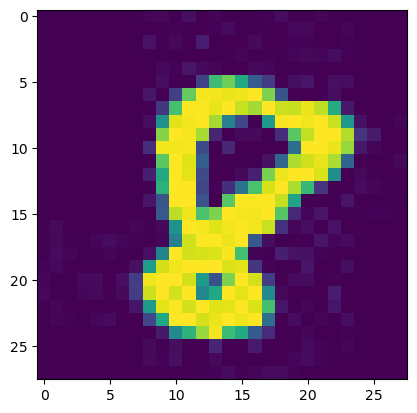

In [8]:
n = 20 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

In [9]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

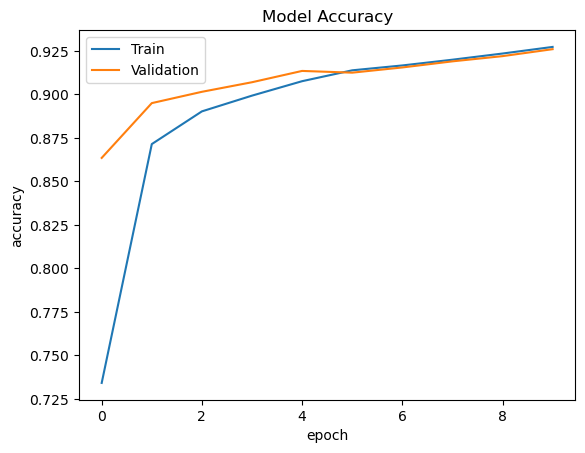

In [10]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

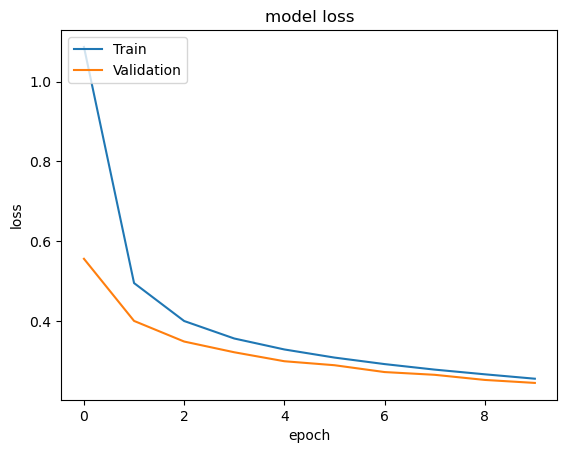

In [11]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

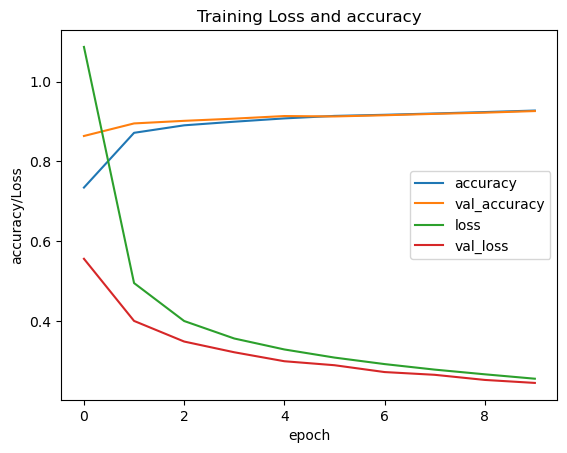

In [12]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])